In [2]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from matplotlib import pyplot as plt
import numpy as np


In [3]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data()
print(y_train_raw[0])
print(x_train_raw.shape, y_train_raw.shape)
print(x_test_raw.shape, y_test_raw.shape)
#Convert the labels into one-hot codes.

5
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train_raw, num_classes)
y_test = keras.utils.to_categorical(y_test_raw, num_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


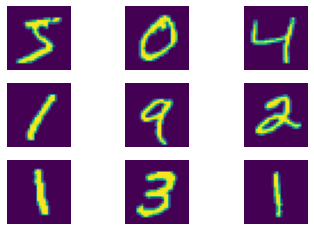

In [8]:
plt.figure()
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(x_train_raw[i])
 #plt.ylabel(y[i].numpy())
 plt.axis('off')
plt.show()

In [9]:
#Convert a 28 x 28 image into a 784 x 1 vector.
x_train = x_train_raw.reshape(60000, 784)
x_test = x_test_raw.reshape(10000, 784)

In [10]:
#Normalize image pixel values.
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [33]:
#Create a deep neural network (DNN) model that consists of three fully connected layers and two RELU activation functions.
model = keras.Sequential([
 layers.Dense(512, activation='relu', input_dim = 784),
 layers.Dense(256, activation='relu'),
 layers.Dense(124, activation='relu'),
layers.Dense(num_classes, activation='softmax')])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 124)               31868     
                                                                 
 dense_13 (Dense)            (None, 10)                1250      
                                                                 
Total params: 566,366
Trainable params: 566,366
Non-trainable params: 0
_________________________________________________________________


In [34]:
Optimizer = optimizers.Adam(0.001)
model.compile(loss=keras.losses.categorical_crossentropy,
 optimizer=Optimizer,
 metrics=['accuracy'])

In [36]:
#Fit the training data to the model by using the fit method.
results = model.fit(x_train, y_train,
 batch_size=128,
 epochs=30,
 verbose=1,
 validation_data=(x_test,y_test))

Epoch 1/30
469/469 [==============================] - 9s 19ms/step - loss: 0.1140 - accuracy: 0.9647 - val_loss: 0.0914 - val_accuracy: 0.9716
Epoch 2/30
469/469 [==============================] - 8s 17ms/step - loss: 0.0695 - accuracy: 0.9783 - val_loss: 0.0788 - val_accuracy: 0.9744
Epoch 3/30
469/469 [==============================] - 8s 16ms/step - loss: 0.0466 - accuracy: 0.9851 - val_loss: 0.0835 - val_accuracy: 0.9763
Epoch 4/30
469/469 [==============================] - 8s 16ms/step - loss: 0.0331 - accuracy: 0.9894 - val_loss: 0.0730 - val_accuracy: 0.9786
Epoch 5/30
469/469 [==============================] - 9s 19ms/step - loss: 0.0284 - accuracy: 0.9910 - val_loss: 0.0738 - val_accuracy: 0.9784
Epoch 6/30
469/469 [==============================] - 8s 17ms/step - loss: 0.0247 - accuracy: 0.9917 - val_loss: 0.0896 - val_accuracy: 0.9768
Epoch 7/30
469/469 [==============================] - 8s 17ms/step - loss: 0.0216 - accuracy: 0.9930 - val_loss: 0.0949 - val_accuracy: 0.9767

In [37]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10109835118055344
Test accuracy: 0.9818999767303467


Text(0, 0.5, 'losses')

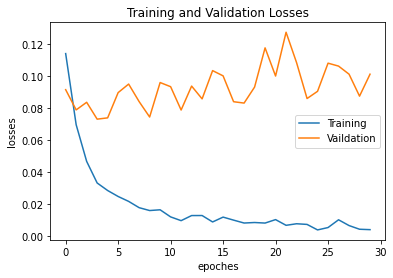

In [38]:
import matplotlib.pyplot as plt
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoches')
plt.ylabel('losses')

Text(0, 0.5, 'accuracy')

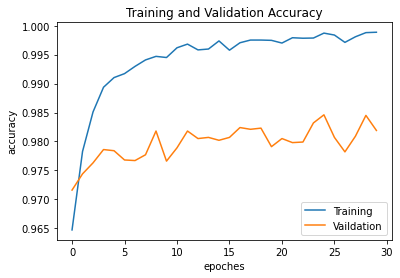

In [39]:
import matplotlib.pyplot as plt
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')

In [40]:
model.save('./model/final_DNN_model.h5')